# 📚 **Importing Libaries**

In [ ]:
import os
import re
import joblib
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential,save_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from tensorflow.keras.layers import Bidirectional
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import StackingClassifier
from scipy.special import softmax
import matplotlib.pyplot as plt



# **🔧 Data PreProcessing**

**📈 Loading Data**

In [ ]:
# Load data
train_df = pd.read_csv("train.csv")
val_df = pd.read_csv("validation.csv")
test_df = pd.read_csv("test.csv")


**🧹 Cleaning Data**

In [ ]:
def clean_text(text):
    text = re.sub(r'https?://\S+', '', text)  # Remove URLs
    text = re.sub(r'@\S+', '', text)          # Remove mentions
    text = re.sub(r'#', '', text)             # Remove hashtags
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)  # Keep alphanumeric
    return text.strip().lower()
# Clean text
train_df['text'] = train_df['text'].astype(str).apply(clean_text)
val_df['text'] = val_df['text'].astype(str).apply(clean_text)
test_df['text'] = test_df['text'].astype(str).apply(clean_text)

X_train = train_df['text']
y_train = train_df['sentiment']
X_val = val_df['text']
y_val = val_df['sentiment']
X_test = test_df['text']
y_test = test_df['sentiment']

🔢 **TF-IDF Vectorization**

In [ ]:
# -----------------------------
# 2. TF-IDF Vectorization (for MNB, LR, SVM, KNN, XGBoost)
# -----------------------------
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)

**🔤 Label Encoder**

In [ ]:
# Encode labels for XGBoost
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_val_encoded=label_encoder.transform(y_val)


**🧊 One Hot Encoding**

In [ ]:
# Convert to one-hot encoding
y_train_cat = to_categorical(y_train_encoded, num_classes=len(label_encoder.classes_))
y_val_cat = to_categorical(y_val_encoded, num_classes=len(label_encoder.classes_))
y_test_cat = to_categorical(y_test_encoded, num_classes=len(label_encoder.classes_))


📄 **Tokenize Text**

In [ ]:

# Tokenize text
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)


**📏 Pad Sequences**

In [ ]:

# Pad sequences
max_len = 128
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')


# 🏋️‍♂️ **Training Models**

🏹 **Multinomial Naive Bayes**

In [ ]:
# Multinomial Naive Bayes
print("\n=== Multinomial Naive Bayes ===")
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)
mnb_preds = mnb.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, mnb_preds))
print("Macro F1:", f1_score(y_test, mnb_preds, average='macro'))
print(classification_report(y_test, mnb_preds))


=== Multinomial Naive Bayes ===
Accuracy: 0.6367479961243724
Macro F1: 0.6024568415840115
              precision    recall  f1-score   support

  Irrelevant       0.75      0.31      0.44      1988
    Negative       0.62      0.80      0.70      3428
     Neutral       0.66      0.54      0.59      2769
    Positive       0.62      0.75      0.68      3168

    accuracy                           0.64     11353
   macro avg       0.66      0.60      0.60     11353
weighted avg       0.65      0.64      0.62     11353



⚖️ **Logistic Regression**

In [ ]:
# Logistic Regression
print("\n=== Logistic Regression ===")
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train_tfidf, y_train)
lr_preds = lr.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, lr_preds))
print("Macro F1:", f1_score(y_test, lr_preds, average='macro'))
print(classification_report(y_test, lr_preds))


=== Logistic Regression ===
Accuracy: 0.6765612613406148
Macro F1: 0.669337114262705
              precision    recall  f1-score   support

  Irrelevant       0.57      0.65      0.61      1988
    Negative       0.75      0.71      0.73      3428
     Neutral       0.63      0.64      0.63      2769
    Positive       0.71      0.69      0.70      3168

    accuracy                           0.68     11353
   macro avg       0.67      0.67      0.67     11353
weighted avg       0.68      0.68      0.68     11353



🛡️ **Support Vector Machine**

In [ ]:
# Support Vector Machine
print("\n=== Support Vector Machine ===")
svm = LinearSVC(class_weight='balanced')
svm.fit(X_train_tfidf, y_train)
svm_preds = svm.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, svm_preds))
print("Macro F1:", f1_score(y_test, svm_preds, average='macro'))
print(classification_report(y_test, svm_preds))


=== Support Vector Machine ===
Accuracy: 0.7005196864264952
Macro F1: 0.6919645449041245
              precision    recall  f1-score   support

  Irrelevant       0.63      0.64      0.63      1988
    Negative       0.77      0.75      0.76      3428
     Neutral       0.68      0.65      0.67      2769
    Positive       0.69      0.73      0.71      3168

    accuracy                           0.70     11353
   macro avg       0.69      0.69      0.69     11353
weighted avg       0.70      0.70      0.70     11353



🗺️**K-Nearest Neighbors**

In [ ]:
# K-Nearest Neighbors
print("\n=== Training KNN ===")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_tfidf, y_train)
knn_preds = knn.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, knn_preds))
print("Macro F1:", f1_score(y_test, knn_preds, average='macro'))
print(classification_report(y_test, knn_preds))


=== Training KNN ===
Accuracy: 0.8596846648462961
Macro F1: 0.8567740472146581
              precision    recall  f1-score   support

  Irrelevant       0.79      0.87      0.83      1988
    Negative       0.86      0.88      0.87      3428
     Neutral       0.88      0.85      0.86      2769
    Positive       0.89      0.84      0.87      3168

    accuracy                           0.86     11353
   macro avg       0.86      0.86      0.86     11353
weighted avg       0.86      0.86      0.86     11353



🌳 **XGBoost**

In [ ]:

# Train XGBoost
print("\n=== Training XGBoost ===")
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    enable_categorical=False
)
xgb.fit(X_train_tfidf, y_train_encoded)
xgb_preds_encoded = xgb.predict(X_test_tfidf)
xgb_preds = label_encoder.inverse_transform(xgb_preds_encoded)

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
print("XGBoost Macro F1:", f1_score(y_test, xgb_preds, average='macro'))
print(classification_report(y_test, xgb_preds))


=== Training XGBoost ===


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:59:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.6537479080419273
XGBoost Macro F1: 0.6267418894177214
              precision    recall  f1-score   support

  Irrelevant       0.74      0.37      0.49      1988
    Negative       0.60      0.85      0.70      3428
     Neutral       0.71      0.56      0.63      2769
    Positive       0.67      0.71      0.69      3168

    accuracy                           0.65     11353
   macro avg       0.68      0.62      0.63     11353
weighted avg       0.67      0.65      0.64     11353



🗳️ **Ensemble Learning (Hard Voting)**

In [ ]:
# Ensemble Learning (Hard Voting)
updated_voting_clf = VotingClassifier(
    estimators=[
        ('mnb', mnb),
        ('lr', lr),
        ('svm', svm),
        ('knn', knn),
        ('xgb', xgb)
    ],
    voting='hard'
)

# Refit and evaluate
updated_voting_clf.fit(X_train_tfidf, y_train_encoded)
ensemble_preds_encoded = updated_voting_clf.predict(X_test_tfidf)
ensemble_preds = label_encoder.inverse_transform(ensemble_preds_encoded)

print("Ensemble (Hard Voting) Accuracy:", accuracy_score(y_test, ensemble_preds))
print("Ensemble (Hard Voting) Macro F1:", f1_score(y_test, ensemble_preds, average='macro'))
print(classification_report(y_test, ensemble_preds))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:01:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble (Hard Voting) Accuracy: 0.7364573240553157
Ensemble (Hard Voting) Macro F1: 0.727194733869694
              precision    recall  f1-score   support

  Irrelevant       0.71      0.65      0.68      1988
    Negative       0.74      0.83      0.78      3428
     Neutral       0.73      0.66      0.69      2769
    Positive       0.75      0.76      0.75      3168

    accuracy                           0.74     11353
   macro avg       0.73      0.72      0.73     11353
weighted avg       0.74      0.74      0.73     11353



⚖️ **Ensemble Learning (Soft Voting)**

In [ ]:
# Ensemble Learning (Soft Voting)
updated_voting_clf = VotingClassifier(
    estimators=[
        ('mnb', mnb),
        ('lr', lr),
        ('knn', knn),
        ('xgb', xgb)
    ],
    voting='soft',
    weights=[1, 2, 4, 1]
)

# Refit and evaluate
updated_voting_clf.fit(X_train_tfidf, y_train_encoded)
ensemble_preds_encoded = updated_voting_clf.predict(X_test_tfidf)
ensemble_preds_soft = label_encoder.inverse_transform(ensemble_preds_encoded)

print("Ensemble (Soft Voting) Accuracy:", accuracy_score(y_test, ensemble_preds_soft))
print("Ensemble (Soft Voting) Macro F1:", f1_score(y_test, ensemble_preds_soft, average='macro'))
print(classification_report(y_test, ensemble_preds_soft))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble (Soft Voting) Accuracy: 0.8771249889896944
Ensemble (Soft Voting) Macro F1: 0.8737705842928059
              precision    recall  f1-score   support

  Irrelevant       0.85      0.84      0.85      1988
    Negative       0.88      0.90      0.89      3428
     Neutral       0.90      0.86      0.88      2769
    Positive       0.87      0.90      0.88      3168

    accuracy                           0.88     11353
   macro avg       0.88      0.87      0.87     11353
weighted avg       0.88      0.88      0.88     11353



🔄 **Prepare and Train LSTM**

In [ ]:
# -----------------------------
# 6. Build and Train LSTM Model
# -----------------------------

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(128, return_sequences=False)),
    Dropout(0.6),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train
print("\n=== Training Improved LSTM Model ===")
history = model.fit(
    X_train_pad, y_train_cat,
    validation_data=(X_val_pad, y_val_cat),
    epochs=20,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate LSTM
print("\n=== LSTM Model Evaluation ===")
loss, acc = model.evaluate(X_test_pad, y_test_cat, verbose=0)
print("LSTM Accuracy:", acc)

# Predict
y_pred_lstm = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred_lstm, axis=1)
y_pred_labels = label_encoder.inverse_transform(y_pred_classes)

# Report
print("Macro F1:", f1_score(y_test, y_pred_labels, average='macro'))
print(classification_report(y_test, y_pred_labels))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



=== Training Improved LSTM Model ===
Epoch 1/20
1656/1656 ━━━━━━━━━━━━━━━━━━━━ 740s 443ms/step - accuracy: 0.5124 - loss: 1.1131 - val_accuracy: 0.7215 - val_loss: 0.7251
Epoch 2/20
1656/1656 ━━━━━━━━━━━━━━━━━━━━ 733s 438ms/step - accuracy: 0.7821 - loss: 0.5848 - val_accuracy: 0.7826 - val_loss: 0.5790
Epoch 3/20
1656/1656 ━━━━━━━━━━━━━━━━━━━━ 744s 439ms/step - accuracy: 0.8515 - loss: 0.4036 - val_accuracy: 0.8113 - val_loss: 0.5201
Epoch 4/20
1656/1656 ━━━━━━━━━━━━━━━━━━━━ 786s 475ms/step - accuracy: 0.8811 - loss: 0.3156 - val_accuracy: 0.8221 - val_loss: 0.5095
Epoch 5/20
1656/1656 ━━━━━━━━━━━━━━━━━━━━ 778s 470ms/step - accuracy: 0.8997 - loss: 0.2593 - val_accuracy: 0.8298 - val_loss: 0.5077
Epoch 6/20
1656/1656 ━━━━━━━━━━━━━━━━━━━━ 794s 465ms/step - accuracy: 0.9154 - loss: 0.2192 - val_accuracy: 0.8317 - val_loss: 0.5177
Epoch 7/20
1656/1656 ━━━━━━━━━━━━━━━━━━━━ 767s 444ms/step - accuracy: 0.9248 - loss: 0.1948 - val_accuracy: 0.8436 - val_loss: 0.5254
Epoch 8/20
1656/1656 ━━━

**🧩 Build and Train CNN Model**

In [ ]:
# -----------------------------
# 7. Build and Train CNN Model
# -----------------------------
print("\n=== Training CNN Model ===")

model_cnn = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    # Use Conv1D layer for text classification
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping
early_stop_cnn = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train CNN
history_cnn = model_cnn.fit(
    X_train_pad, y_train_cat,
    validation_data=(X_val_pad, y_val_cat),
    epochs=20,
    batch_size=32,
    callbacks=[early_stop_cnn],
    verbose=1
)

# Evaluate CNN
print("\n=== CNN Model Evaluation ===")
loss_cnn, acc_cnn = model_cnn.evaluate(X_test_pad, y_test_cat, verbose=0)
print("CNN Accuracy:", acc_cnn)

# Predict CNN outputs
y_pred_cnn = model_cnn.predict(X_test_pad)
y_pred_classes_cnn = np.argmax(y_pred_cnn, axis=1)
y_pred_labels_cnn = label_encoder.inverse_transform(y_pred_classes_cnn)

# Classification Report
print("Macro F1 (CNN):", f1_score(y_test, y_pred_labels_cnn, average='macro'))
print(classification_report(y_test, y_pred_labels_cnn))


=== Training CNN Model ===
Epoch 1/20
1656/1656 ━━━━━━━━━━━━━━━━━━━━ 117s 70ms/step - accuracy: 0.5151 - loss: 1.1243 - val_accuracy: 0.7610 - val_loss: 0.6299
Epoch 2/20
1656/1656 ━━━━━━━━━━━━━━━━━━━━ 104s 63ms/step - accuracy: 0.8363 - loss: 0.4607 - val_accuracy: 0.8347 - val_loss: 0.4522
Epoch 3/20
1656/1656 ━━━━━━━━━━━━━━━━━━━━ 149s 67ms/step - accuracy: 0.9175 - loss: 0.2248 - val_accuracy: 0.8486 - val_loss: 0.4350
Epoch 4/20
1656/1656 ━━━━━━━━━━━━━━━━━━━━ 135s 63ms/step - accuracy: 0.9393 - loss: 0.1554 - val_accuracy: 0.8591 - val_loss: 0.4715
Epoch 5/20
1656/1656 ━━━━━━━━━━━━━━━━━━━━ 146s 65ms/step - accuracy: 0.9482 - loss: 0.1273 - val_accuracy: 0.8536 - val_loss: 0.5125
Epoch 6/20
1656/1656 ━━━━━━━━━━━━━━━━━━━━ 139s 63ms/step - accuracy: 0.9528 - loss: 0.1157 - val_accuracy: 0.8584 - val_loss: 0.5663

=== CNN Model Evaluation ===
CNN Accuracy: 0.845943808555603
355/355 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
Macro F1 (CNN): 0.8422038916056965
              precision    recall  

**🤹 Stacking Ensemble**

In [ ]:
# Stacking Ensemble
print("\n=== Stacking Ensemble  ===")
stacking_clf = StackingClassifier(
    estimators=[
        ('mnb', mnb),
        ('lr', lr),
        ('svm', svm),
        ('knn', knn),
        ('xgb', xgb)
        # LSTM is not included as an estimator due to different input format; its predictions are used instead
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    passthrough=False
)

# Create stacking_X_train with numerical predictions
stacking_X_train = np.column_stack([
    mnb.predict(X_train_tfidf),  # String labels
    lr.predict(X_train_tfidf),   # String labels
    svm.predict(X_train_tfidf),  # String labels
    knn.predict(X_train_tfidf),  # String labels
    xgb.predict(X_train_tfidf),  # Numerical labels (encoded)
    np.argmax(model.predict(X_train_pad, verbose=0), axis=1)  # Numerical labels (encoded)
])

# Since mnb, lr, svm, and knn predict string labels, we need to encode them to numerical values
# Create a new LabelEncoder for the predictions (or reuse the existing one)
pred_encoder = LabelEncoder()
# Fit on all possible string labels from y_train
pred_encoder.fit(y_train)

# Transform string predictions to numerical
stacking_X_train[:, 0] = pred_encoder.transform(stacking_X_train[:, 0])  # mnb
stacking_X_train[:, 1] = pred_encoder.transform(stacking_X_train[:, 1])  # lr
stacking_X_train[:, 2] = pred_encoder.transform(stacking_X_train[:, 2])  # svm
stacking_X_train[:, 3] = pred_encoder.transform(stacking_X_train[:, 3])  # knn
# XGBoost and LSTM are already numerical, so no transformation needed for columns 4 and 5

# Fit stacking classifier using numerical features and encoded y_train
stacking_clf.fit(stacking_X_train, y_train_encoded)

# Create test predictions for stacking
test_preds = np.column_stack([
    mnb_preds,
    lr_preds,
    svm_preds,
    knn_preds,
    xgb_preds_encoded,  # Use encoded XGBoost predictions
    np.argmax(y_pred_lstm, axis=1)  # Use encoded LSTM predictions
])

# Transform string predictions to numerical for test_preds
test_preds[:, 0] = pred_encoder.transform(test_preds[:, 0])  # mnb
test_preds[:, 1] = pred_encoder.transform(test_preds[:, 1])  # lr
test_preds[:, 2] = pred_encoder.transform(test_preds[:, 2])  # svm
test_preds[:, 3] = pred_encoder.transform(test_preds[:, 3])  # knn
# XGBoost and LSTM are already numerical

# Predict using test predictions as features
stacking_preds_encoded = stacking_clf.predict(test_preds)
stacking_preds = label_encoder.inverse_transform(stacking_preds_encoded)

print("Stacking Ensemble Accuracy:", accuracy_score(y_test, stacking_preds))
print("Stacking Ensemble Macro F1:", f1_score(y_test, stacking_preds, average='macro'))
print(classification_report(y_test, stacking_preds))


=== Stacking Ensemble  ===


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:10:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:10:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:11:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:11:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:11:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Ensemble Accuracy: 0.8588038403946093
Stacking Ensemble Macro F1: 0.856538085505268
              precision    recall  f1-score   support

  Irrelevant       0.86      0.82      0.84      1988
    Negative       0.87      0.87      0.87      3428
     Neutral       0.85      0.85      0.85      2769
    Positive       0.85      0.88      0.86      3168

    accuracy                           0.86     11353
   macro avg       0.86      0.85      0.86     11353
weighted avg       0.86      0.86      0.86     11353



**🏗️ Soft voting (LSTM and CNN)**

In [ ]:
# Get softmax probabilities for stacking or soft voting
lstm_probs = softmax(y_pred_lstm, axis=1)
cnn_probs = softmax(y_pred_cnn, axis=1)

# Combine predictions using soft voting (average probabilities)
combined_probs = (lstm_probs + cnn_probs) / 2
final_preds = np.argmax(combined_probs, axis=1)
final_labels = label_encoder.inverse_transform(final_preds)

# Evaluate ensemble
print("\n=== CNN + LSTM Soft Voting Ensemble ===")
print("Ensemble Accuracy (CNN+LSTM):", accuracy_score(y_test, final_labels))
print("Ensemble Macro F1 (CNN+LSTM):", f1_score(y_test, final_labels, average='macro'))
print(classification_report(y_test, final_labels))


=== CNN + LSTM Soft Voting Ensemble ===
Ensemble Accuracy (CNN+LSTM): 0.8612701488593323
Ensemble Macro F1 (CNN+LSTM): 0.858129028293452
              precision    recall  f1-score   support

  Irrelevant       0.85      0.82      0.84      1988
    Negative       0.89      0.87      0.88      3428
     Neutral       0.82      0.88      0.85      2769
    Positive       0.88      0.86      0.87      3168

    accuracy                           0.86     11353
   macro avg       0.86      0.86      0.86     11353
weighted avg       0.86      0.86      0.86     11353



# 🏆 **Results**

In [ ]:
# Update the results printing section to include CNN and CNN-LSTM ensemble
print("\n=== Updated Model Accuracy Scores ===")
print(f"Multinomial Naive Bayes: {accuracy_score(y_test, mnb_preds):.4f}")
print(f"Logistic Regression: {accuracy_score(y_test, lr_preds):.4f}")
print(f"Support Vector Machine: {accuracy_score(y_test, svm_preds):.4f}")
print(f"K-Nearest Neighbors: {accuracy_score(y_test, knn_preds):.4f}")
print(f"XGBoost: {accuracy_score(y_test, xgb_preds):.4f}")
print(f"Ensemble (Hard Voting): {accuracy_score(y_test, ensemble_preds):.4f}")
print(f"Ensemble (Soft Voting): {accuracy_score(y_test, ensemble_preds_soft):.4f}")
print(f"Stacking Ensemble: {accuracy_score(y_test, stacking_preds):.4f}")
print(f"LSTM: {acc:.4f}")
print(f"CNN: {acc_cnn:.4f}")
print(f"CNN + LSTM Ensemble: {accuracy_score(y_test, final_labels):.4f}")

print("\n=== Updated Model Macro F1 Scores ===")
print(f"Multinomial Naive Bayes: {f1_score(y_test, mnb_preds, average='macro'):.4f}")
print(f"Logistic Regression: {f1_score(y_test, lr_preds, average='macro'):.4f}")
print(f"Support Vector Machine: {f1_score(y_test, svm_preds, average='macro'):.4f}")
print(f"K-Nearest Neighbors: {f1_score(y_test, knn_preds, average='macro'):.4f}")
print(f"XGBoost: {f1_score(y_test, xgb_preds, average='macro'):.4f}")
print(f"Ensemble (Hard Voting): {f1_score(y_test, ensemble_preds, average='macro'):.4f}")
print(f"Ensemble (Soft Voting): {f1_score(y_test, ensemble_preds_soft, average='macro'):.4f}")
print(f"Stacking Ensemble: {f1_score(y_test, stacking_preds, average='macro'):.4f}")
print(f"LSTM: {f1_score(y_test, y_pred_labels, average='macro'):.4f}")
print(f"CNN: {f1_score(y_test, y_pred_labels_cnn, average='macro'):.4f}")
print(f"CNN + LSTM Ensemble: {f1_score(y_test, final_labels, average='macro'):.4f}")


=== Updated Model Accuracy Scores ===
Multinomial Naive Bayes: 0.6367
Logistic Regression: 0.6766
Support Vector Machine: 0.7005
K-Nearest Neighbors: 0.8597
XGBoost: 0.6537
Ensemble (Hard Voting): 0.7365
Ensemble (Soft Voting): 0.8771
Stacking Ensemble: 0.8588
LSTM: 0.8230
CNN: 0.8459
CNN + LSTM Ensemble: 0.8613

=== Updated Model Macro F1 Scores ===
Multinomial Naive Bayes: 0.6025
Logistic Regression: 0.6693
Support Vector Machine: 0.6920
K-Nearest Neighbors: 0.8568
XGBoost: 0.6267
Ensemble (Hard Voting): 0.7272
Ensemble (Soft Voting): 0.8738
Stacking Ensemble: 0.8565
LSTM: 0.8186
CNN: 0.8422
CNN + LSTM Ensemble: 0.8581


# 💾 **Save Models**

In [ ]:


# Define directory to save models
model_dir = 'models'
os.makedirs(model_dir, exist_ok=True)

# -----------------------------
# Save Preprocessing Objects
# -----------------------------
joblib.dump(vectorizer, os.path.join(model_dir, 'tfidf_vectorizer.joblib'))
joblib.dump(label_encoder, os.path.join(model_dir, 'label_encoder.joblib'))
joblib.dump(tokenizer, os.path.join(model_dir, 'tokenizer.joblib'))

# -----------------------------
# Save Scikit-Learn Models
# -----------------------------
joblib.dump(mnb, os.path.join(model_dir, 'mnb_model.joblib'))
joblib.dump(lr, os.path.join(model_dir, 'lr_model.joblib'))
joblib.dump(svm, os.path.join(model_dir, 'svm_model.joblib'))
joblib.dump(knn, os.path.join(model_dir, 'knn_model.joblib'))
joblib.dump(xgb, os.path.join(model_dir, 'xgb_model.joblib'))

# Save Voting Classifiers
joblib.dump(updated_voting_clf, os.path.join(model_dir, 'hard_voting_model.joblib'))  # Hard Voting
joblib.dump(updated_voting_clf, os.path.join(model_dir, 'soft_voting_model.joblib'))  # Soft Voting

# Save Stacking Classifier
joblib.dump(stacking_clf, os.path.join(model_dir, 'stacking_model.joblib'))

# -----------------------------
# Save XGBoost Model (native method)
# -----------------------------
xgb.save_model(os.path.join(model_dir, 'xgb_model.json'))

# -----------------------------
# Save Keras Deep Learning Models
# -----------------------------
# Save LSTM model
save_model(model, os.path.join(model_dir, 'lstm_model.h5'))

# If you trained a CNN model:
if 'model_cnn' in locals() or 'model_cnn' in globals():
    save_model(model_cnn, os.path.join(model_dir, 'cnn_model.h5'))

print("✅ All models and preprocessing objects saved successfully.")

✅ All models and preprocessing objects saved successfully.


# 📊 **Visualization**

**🔁 LSTM Convergence Plot**

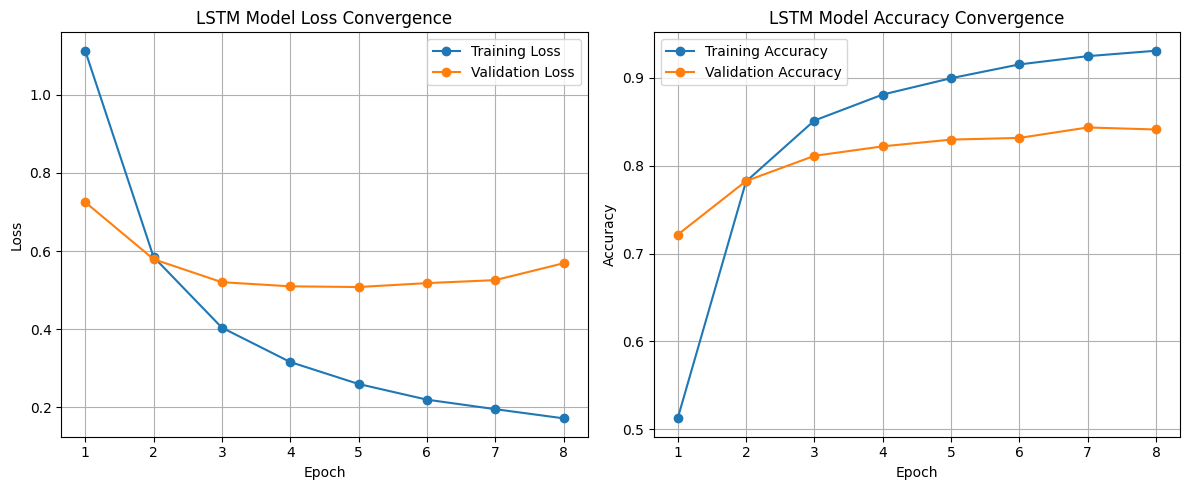

In [1]:

# Data from LSTM training
epochs = range(1, 9)
train_loss = [1.1131, 0.5848, 0.4036, 0.3156, 0.2593, 0.2192, 0.1948, 0.1713]
val_loss = [0.7251, 0.5790, 0.5201, 0.5095, 0.5077, 0.5177, 0.5254, 0.5686]
train_accuracy = [0.5124, 0.7821, 0.8515, 0.8811, 0.8997, 0.9154, 0.9248, 0.9310]
val_accuracy = [0.7215, 0.7826, 0.8113, 0.8221, 0.8298, 0.8317, 0.8436, 0.8413]

# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('LSTM Model Loss Convergence')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('LSTM Model Accuracy Convergence')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()

**📷 CNN Convergence Plot**

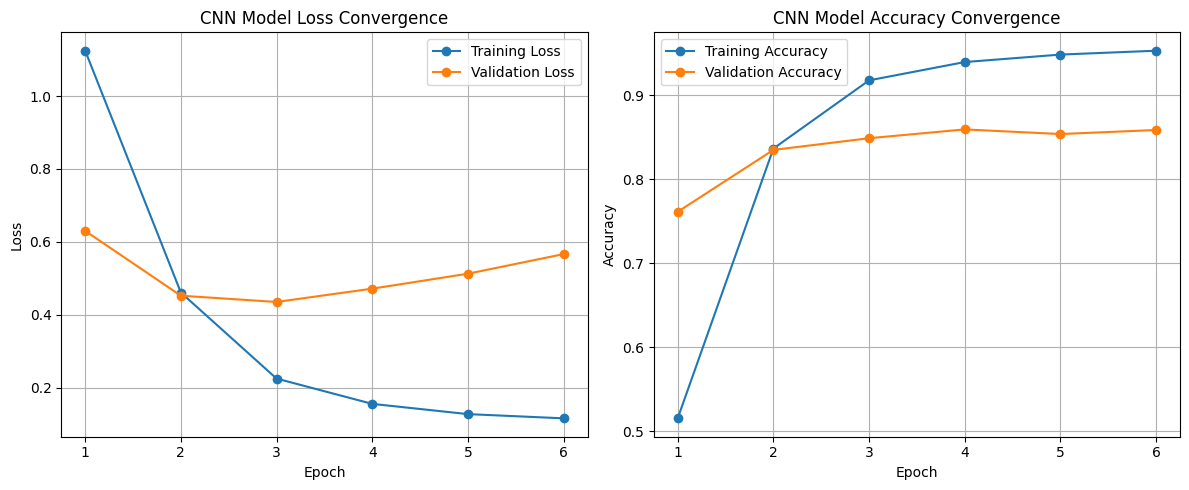

In [2]:
# Data from CNN training
epochs = range(1, 7)
train_loss = [1.1243, 0.4607, 0.2248, 0.1554, 0.1273, 0.1157]
val_loss = [0.6299, 0.4522, 0.4350, 0.4715, 0.5125, 0.5663]
train_accuracy = [0.5151, 0.8363, 0.9175, 0.9393, 0.9482, 0.9528]
val_accuracy = [0.7610, 0.8347, 0.8486, 0.8591, 0.8536, 0.8584]

# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('CNN Model Loss Convergence')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('CNN Model Accuracy Convergence')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()